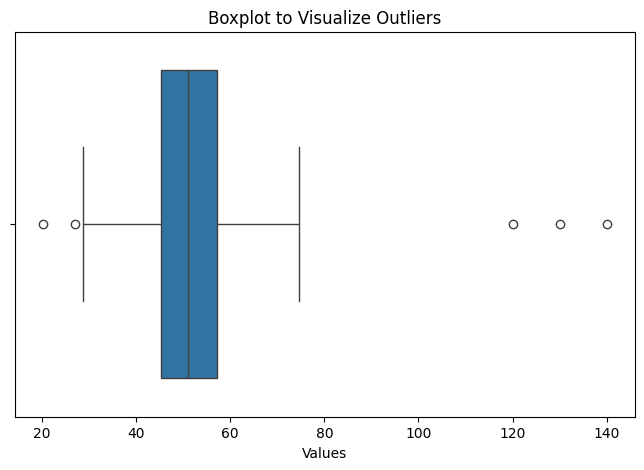

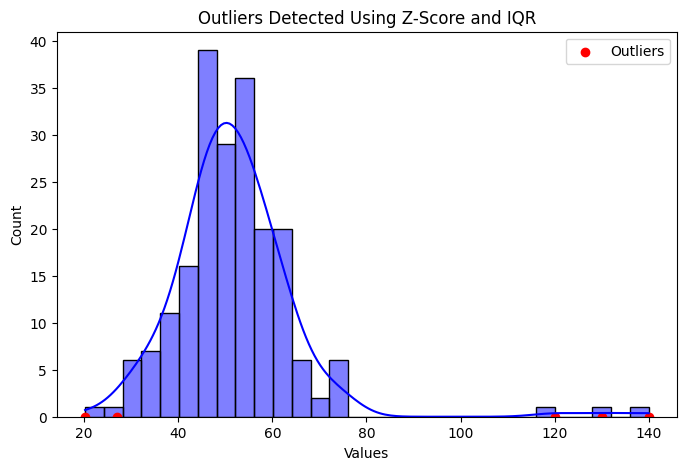

Outlier indices: [159 164 200 201 202]


In [1]:
# Question: Combining Multiple Outlier Detection Methods
# Description: Combine Z-score, IQR, and Boxplot methods to detect and compare outliers in adataset.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate sample data
np.random.seed(10)
data = np.random.normal(50, 10, 200)
data = np.append(data, [120, 130, 140])  # Add some outliers

# Create DataFrame
df = pd.DataFrame({'Values': data})

# Method 1: Z-Score Outlier Detection
z_scores = np.abs(stats.zscore(df['Values']))
z_threshold = 3
z_outliers = z_scores > z_threshold

# Method 2: IQR Outlier Detection
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1
IQR_outliers = (df['Values'] < (Q1 - 1.5 * IQR)) | (df['Values'] > (Q3 + 1.5 * IQR))

# Method 3: Boxplot Outlier Detection (Visualized in the plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Values'])
plt.title("Boxplot to Visualize Outliers")
plt.show()

# Combine Results
outliers_combined = z_outliers | IQR_outliers

# Visualize the combined results
plt.figure(figsize=(8, 5))
sns.histplot(df['Values'], kde=True, color='blue')
plt.scatter(df[outliers_combined]['Values'], np.zeros(len(df[outliers_combined])), color='red', label='Outliers')
plt.title("Outliers Detected Using Z-Score and IQR")
plt.legend()
plt.show()

# Print outlier indices
outlier_indices = np.where(outliers_combined)[0]
print(f"Outlier indices: {outlier_indices}")